In [28]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df =  pd.read_csv(mouse_drug_data_to_load, encoding="utf-8")
clinic_df = pd.read_csv(clinical_trial_data_to_load, encoding="utf-8")

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinic_df)

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [29]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group1 = merge_df.groupby(['Drug','Timepoint'])
mean_tumor_volume = group1['Tumor Volume (mm3)'].mean()
# Convert to DataFratimepoint_me
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
# Preview DataFrame

mean_tumor_volume_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [30]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group2 = merge_df.groupby(['Drug','Timepoint'])
err_tumor_volume = group2['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
err_tumor_volume_df =pd.DataFrame(err_tumor_volume) 
# Preview DataFrame
err_tumor_volume_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [31]:
# Minor Data Munging to Re-Format the Data Frames
munge_df = pd.pivot_table(merge_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
munge_df = munge_df.loc[ : , 'Tumor Volume (mm3)']
munge_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [32]:
# Generate the Plot (with Error Bars)
mean_tumor_volume_df.reset_index(inplace=True)




In [33]:
#Extract

capomulin = mean_tumor_volume_df.loc[mean_tumor_volume_df['Drug'] == 'Capomulin']
infubinol = mean_tumor_volume_df.loc[mean_tumor_volume_df['Drug'] == 'Infubinol']
ketapril = mean_tumor_volume_df.loc[mean_tumor_volume_df['Drug'] == 'Ketapril']
placebo = mean_tumor_volume_df.loc[mean_tumor_volume_df['Drug'] == 'Placebo']

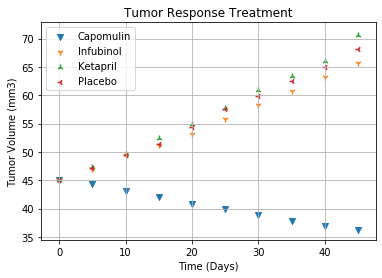

In [39]:
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'], marker="v", label="Capomulin")
plt.scatter(infubinol['Timepoint'], infubinol['Tumor Volume (mm3)'], marker="1", label="Infubinol")
plt.scatter(ketapril['Timepoint'], ketapril['Tumor Volume (mm3)'], marker="2", label="Ketapril")
plt.scatter(placebo['Timepoint'], placebo['Tumor Volume (mm3)'], marker="3", label="Placebo")

plt.title("Tumor Response Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend()
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [40]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta = merge_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
mean_meta_df = pd.DataFrame(mean_meta)
# Preview DataFrame
mean_meta_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [41]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
group3 = merge_df.groupby(['Drug','Timepoint'])
err_tumor_volume = group3['Metastatic Sites'].sem()
# Convert to DataFrame
err_tumor_volume_df = pd.DataFrame(err_tumor_volume)
# Preview DataFrame
err_tumor_volume_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [42]:
# Minor Data Munging to Re-Format the Data Frames
munge2_df = pd.pivot_table(merge_df, index=['Timepoint'], columns=['Drug'])
# Preview that Reformatting worked
munge_df2 = munge2_df.loc[ : , 'Metastatic Sites']

munge_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


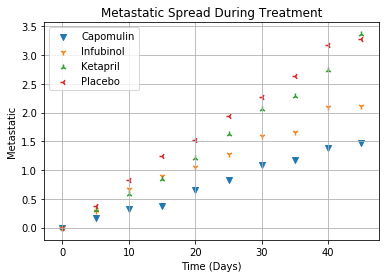

In [43]:
# Generate the Plot (with Error Bars)
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

mean_meta_df.reset_index(inplace=True)

capomulin = mean_meta_df.loc[mean_meta_df['Drug'] == 'Capomulin']
infubinol = mean_meta_df.loc[mean_meta_df['Drug'] == 'Infubinol']
ketapril = mean_meta_df.loc[mean_meta_df['Drug'] == 'Ketapril']
placebo = mean_meta_df.loc[mean_meta_df['Drug'] == 'Placebo']

plt.scatter(capomulin['Timepoint'], capomulin['Metastatic Sites'], marker="v", label="Capomulin")
plt.scatter(infubinol['Timepoint'], infubinol['Metastatic Sites'], marker="1", label="Infubinol")
plt.scatter(ketapril['Timepoint'], ketapril['Metastatic Sites'], marker="2", label="Ketapril")
plt.scatter(placebo['Timepoint'], placebo['Metastatic Sites'], marker="3", label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend()
plt.show()
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [44]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group3 = merge_df.groupby(['Drug','Timepoint'])
mice_count = group3['Mouse ID'].count()
# Convert to DataFrame
count_mice_df = pd.DataFrame(mice_count)
# Preview DataFrame
count_mice_df.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [45]:
# Minor Data Munging to Re-Format the Data Frames

mice = count_mice_df.groupby(['Drug', 'Timepoint'])['Mouse ID']
mice_df = pd.DataFrame(mice)

# Preview the Data Frame
mice_df

,0,1
0,"(Capomulin, 0)",Drug Timepoint Capomulin 0 2...
1,"(Capomulin, 5)",Drug Timepoint Capomulin 5 2...
2,"(Capomulin, 10)",Drug Timepoint Capomulin 10 2...
3,"(Capomulin, 15)",Drug Timepoint Capomulin 15 2...
4,"(Capomulin, 20)",Drug Timepoint Capomulin 20 2...
...,...,...
95,"(Zoniferol, 25)",Drug Timepoint Zoniferol 25 1...
96,"(Zoniferol, 30)",Drug Timepoint Zoniferol 30 1...
97,"(Zoniferol, 35)",Drug Timepoint Zoniferol 35 1...
98,"(Zoniferol, 40)",Drug Timepoint Zoniferol 40 1...


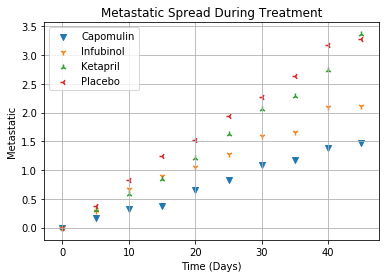

In [46]:
# Generate the Plot (Accounting for percentages)
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

mean_meta_df.reset_index(inplace=True)

capomulin = mean_meta_df.loc[mean_meta_df['Drug'] == 'Capomulin']
infubinol = mean_meta_df.loc[mean_meta_df['Drug'] == 'Infubinol']
ketapril = mean_meta_df.loc[mean_meta_df['Drug'] == 'Ketapril']
placebo = mean_meta_df.loc[mean_meta_df['Drug'] == 'Placebo']

plt.scatter(capomulin['Timepoint'], capomulin['Metastatic Sites'], marker="v", label="Capomulin")
plt.scatter(infubinol['Timepoint'], infubinol['Metastatic Sites'], marker="1", label="Infubinol")
plt.scatter(ketapril['Timepoint'], ketapril['Metastatic Sites'], marker="2", label="Ketapril")
plt.scatter(placebo['Timepoint'], placebo['Metastatic Sites'], marker="3", label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend()
plt.show()
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)